# HomeWork 8
**DeadLine : 23:59 29 Aban 1400**

**Total points : 100pts**

# 1. Mount Google Drive

In [13]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: ignored

# 2. Make your costome dataset   
 **یادآوری:** این بلوک فقط یکبار اجرا شود تا دیتاست در گوگل درایو ذخیره شود
 از دفعه دوم نیازی به اجرای آن بلوک نیست
 

## 2.1. Download dataset using google scraping

download and install google scraping tools:

In [ ]:
!git clone https://github.com/Joeclinton1/google-images-download.git
!cd /content/google-images-download/ && python setup.py install

fatal: destination path 'google-images-download' already exists and is not an empty directory.
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
writing google_images_download.egg-info/PKG-INFO
writing dependency_links to google_images_download.egg-info/dependency_links.txt
writing entry points to google_images_download.egg-info/entry_points.txt
writing requirements to google_images_download.egg-info/requires.txt
writing top-level names to google_images_download.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
writing manifest file 'google_images_download.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.lin

costom dataset config:

In [ ]:
!echo '{"Records": [{"keywords": "car","limit": 60,"size": "medium","print_urls": true},{"keywords": "bird","limit": 60,"size": "medium","print_urls": true},{"keywords": "Leopard","limit": 60,"size": "medium","print_urls": true},{"keywords": "cat","limit": 60,"size": "medium","print_urls": true},{"keywords": "dog","limit": 60,"size": "medium","print_urls": true}]}' > dataset.json

download 40-50 image for each category
maybe take 2 or 3 minute ...

In [ ]:
!googleimagesdownload -cf dataset.json


Item no.: 1 --> Item name = car
Evaluating...
Starting Download...
Image URL: https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/2019-honda-civic-sedan-1558453497.jpg?crop=1xw:0.9997727789138833xh;center,top&resize=480:*
Completed Image ====> 1.2019-honda-civic-sedan-1558453497.jpg
Image URL: https://cars.usnews.com/static/images/Auto/custom/14737/2022_Acura_ILX_1.jpg
IOError on an image...trying next one... Error: The read operation timed out
Image URL: https://auto1-homepage.prod.mp.auto1.cloud/static/optimized/orange-car-hp-right-mercedez.png
Completed Image ====> 2.orange-car-hp-right-mercedez.png
Image URL: https://1auto.co/storage/ready_for_sales/20210709155718_2022-chevrolet-corvette-z06-1607016574.jpg
Completed Image ====> 3.20210709155718_2022-chevrolet-corvette-z06-1607016574.jpg
Image URL: https://api.ferrarinetwork.ferrari.com/v2/network-content/medias//resize/5f993356fe3b8d087f91e1c5-ferrari-roma-car-design-award_2020?apikey=9QscUiwr5n0NhOuQb463QEKghPrVlpaF&widt

## 2.2 Splite data To train set && test set

In [ ]:
import os
import shutil
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']

os.makedirs('./test/')
for category in categories:
    os.makedirs('./test/'+category)
os.rename('./downloads', './train')

FileExistsError: ignored

In [ ]:
import os
import shutil

categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    src_files = os.listdir(src)
    print(len(src_files))
    i=0
    for file_name in src_files:
        if i > (0.2*(len(src_files))):
            break
        full_file_name = os.path.join(src, file_name)
        if os.path.isfile(full_file_name):
            shutil.move(full_file_name, dest)
        i+=1
        


In [ ]:
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    print(category, 'test imagess: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


## 2.2. Copy Training data to Google Drive

In [ ]:
import os
import shutil

destination='/content/drive/MyDrive/HW7_Dataset/'
if not os.path.isdir(destination):
    os.makedirs(destination)
shutil.move('./train/', destination)
shutil.move('./test/', destination)


In [ ]:
for category in categories:
    src=destination+'./train/'+category
    dest=destination+'./test/'+category
    print(category, 'test imagess: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


# 3. Load Dataset From Google Drive

In [14]:
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
import os
import shutil

destination='/content/drive/MyDrive/HW7_Dataset/'
if not os.path.isdir(destination):
    os.makedirs(destination)
os.system('cp -r '+destination+'train/'+ ' ./')
os.system('cp -r '+destination+'test/'+ ' ./')


256

In [15]:
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    print(category, 'test imagess: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


FileNotFoundError: ignored

# 4. Generator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 16
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(ٔNone)
validation_generator = test_datagen.flow_from_directory(None)


In [ ]:
x, y=train_generator.__getitem__(1)
print(x.shape)
print(y.shape)

(16, 300, 300, 3)
(16, 5)


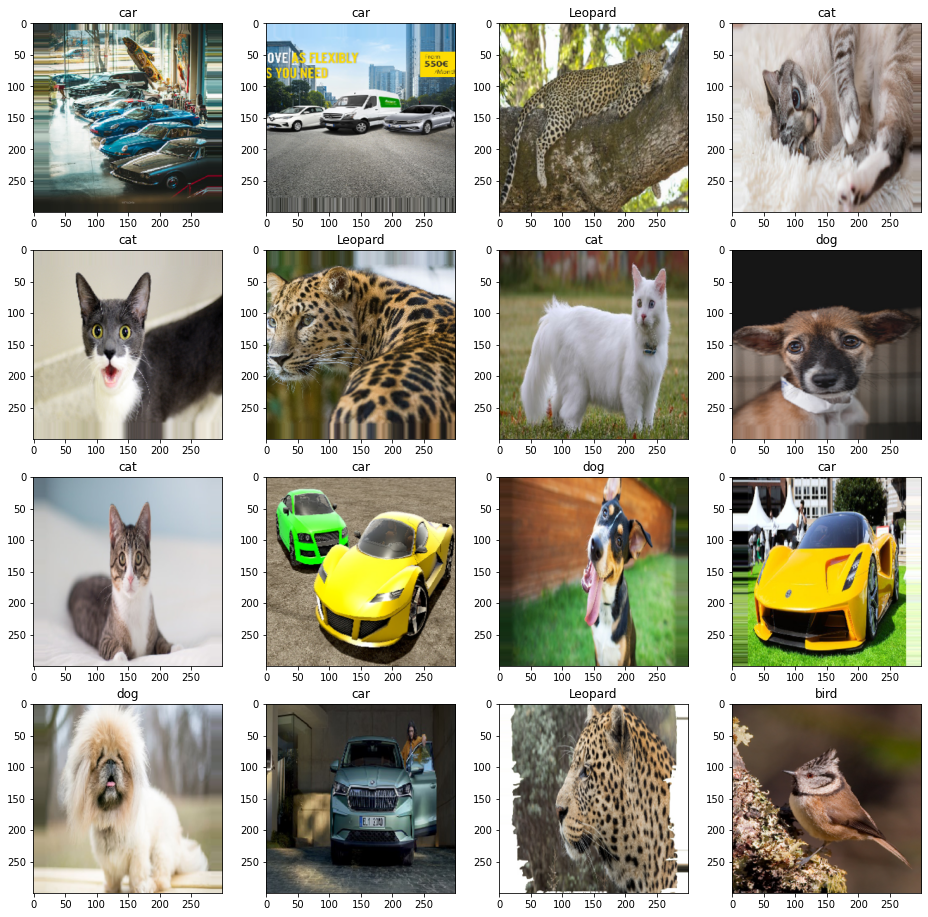

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
x, y=train_generator.__getitem__(3)

def plot_img(x_train, y_train):
    from matplotlib import pyplot as plt
    fig=plt.figure(figsize=(16, 16))
    columns = 4
    rows = 4
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        img = x_train[i-1]
        plt.imshow(img)
        plt.title(categories[np.argmax(y[i-1])])
    plt.show()
plot_img(x, y)


# Part A: build and train model without using data augmentation

In [ ]:
def build_model()

  return model

In [ ]:
model = build_model()
loss = None
optimizer = None
model.compile(loss= loss, optimizer= optimizer, metrics=None)
model.fit(train_generator, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=validation_generator)

In [ ]:
model.evaluate(test_generator, batch_size=BATCH_SIZE)

# Part B: train model using data augmentation

In [ ]:
model = build_model()
loss = None
optimizer = None
model.compile(loss= loss, optimizer= optimizer, metrics=None)
model.fit(train_generator, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=validation_generator)

In [ ]:
model.evaluate(test_generator, batch_size=BATCH_SIZE)

# Part C: build and train model with dropout

In [ ]:
def build_model()

  return model

In [ ]:
model = build_model()
loss = None
optimizer = None
model.compile(loss= loss, optimizer= optimizer, metrics=None)
model.fit(train_generator, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=validation_generator)

In [ ]:
model.evaluate(test_generator, batch_size=BATCH_SIZE)